<a href="https://colab.research.google.com/github/k3vin527/ML/blob/master/colab_02_pima_indin_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pwd

'/content'

In [1]:
# 파일 선택을 통해 예제 데이터를 내 컴퓨터에서 불러옵니다.
from google.colab import files
uploaded = files.upload()
my_data = 'pima-indians-diabetes.csv'

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(my_data,
                 names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"]
)

In [6]:
# 탐색적 데이터 분석 (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.corr

<bound method DataFrame.corr of      pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  \
0           6     148        72         35        0  33.6     0.627   50   
1           1      85        66         29        0  26.6     0.351   31   
2           8     183        64          0        0  23.3     0.672   32   
3           1      89        66         23       94  28.1     0.167   21   
4           0     137        40         35      168  43.1     2.288   33   
..        ...     ...       ...        ...      ...   ...       ...  ...   
763        10     101        76         48      180  32.9     0.171   63   
764         2     122        70         27        0  36.8     0.340   27   
765         5     121        72         23      112  26.2     0.245   30   
766         1     126        60          0        0  30.1     0.349   47   
767         1      93        70         31        0  30.4     0.315   23   

     class  
0        1  
1        0  
2        1  
3  

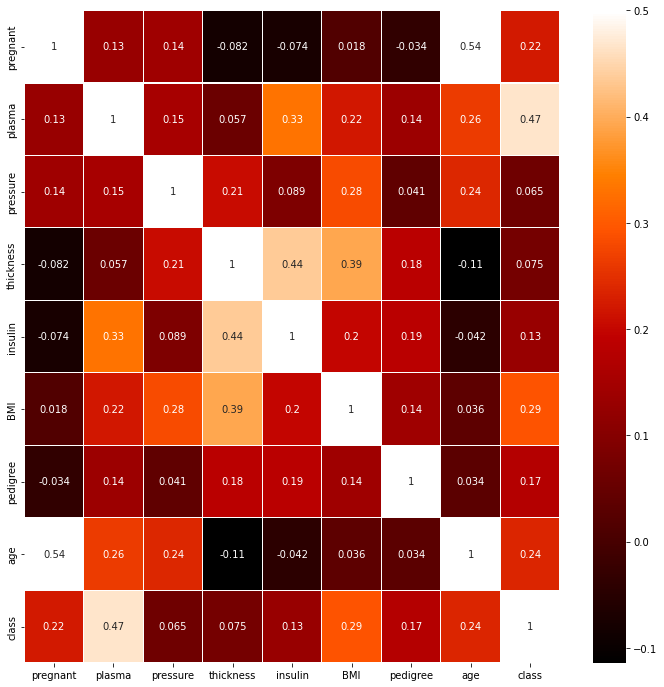

In [19]:
colormap = plt.cm.gist_heat # 그래프 색상 구성 지정
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(), linewidths= 0.1, vmax = 0.5, cmap = colormap, linecolor = 'white', annot = True)
plt.show()

In [17]:
df[['plasma', 'class']]

,plasma,class
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1
...,...,...
763,101,0
764,122,0
765,121,0
766,126,1


In [20]:
df['plasma'].mean()  # plasma : 공복혈당농도

120.89453125

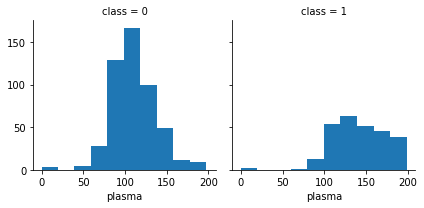

In [22]:
grid = sns.FacetGrid(df, col = 'class')
grid.map(plt.hist, 'plasma', bins = 10)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import tensorflow as tf

In [25]:
# 실행할 때마다 같은 결과 출력하기 위해 설정해 주기
np.random.seed(42) # 넘파이의 random 함수의 테이블의 값 지정
tf.random.set_seed(42) # set_seed 로 지정된 난수 값 사용

In [26]:
np.loadtxt(my_data, delimiter = ',')

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [27]:
dataset = np.loadtxt(my_data, delimiter = ',')
x = dataset[:, :-1]
y = dataset[:, -1]


In [28]:
x, y

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
        0., 1., 0., 0., 0., 1., 1., 0.,

In [29]:
# 모델 설정 (은닉층 2개, 출력층 1개)

model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu')) # 8개 입력값 설정, 활성화함수 'relu' 사용
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류 (1,0) >> 활성화 함수 sigmoid 사용

In [31]:
# 모델 컴파일 (환경설정)

model.compile(loss = 'binary_crossentropy',  # 오차 함수 : 이진 교차 엔트로피
              optimizer = 'adam',            # 최적화함수 : adam
              metrics = ['accuracy'])        # 측정 : 정확도

In [32]:
# 모델 실행

model.fit(x, y, epochs = 200, batch_size=10)
# 실행 : fit, epochs : 반복횟수, batch_size : 배치단위 10개 묶어서 실행함

Epoch 1/200
77/77 [==============================] - 1s 3ms/step - loss: 2.6924 - accuracy: 0.4896
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 1.2286 - accuracy: 0.5703
Epoch 3/200
77/77 [==============================] - 0s 2ms/step - loss: 1.1255 - accuracy: 0.6211
Epoch 4/200
77/77 [==============================] - 0s 2ms/step - loss: 1.0235 - accuracy: 0.5990
Epoch 5/200
77/77 [==============================] - 0s 2ms/step - loss: 0.9394 - accuracy: 0.6120
Epoch 6/200
77/77 [==============================] - 0s 2ms/step - loss: 0.9052 - accuracy: 0.6224
Epoch 7/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8626 - accuracy: 0.6380
Epoch 8/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8055 - accuracy: 0.6276
Epoch 9/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8058 - accuracy: 0.6094
Epoch 10/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7795 - accuracy: 0.6406
Epoch 11/

In [34]:
# 결과 출력
print("\n Accuracy : %.4f"%(model.evaluate(x,y)[1]))

24/24 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.7917

 Accuracy : 0.7917


In [35]:
model.evaluate(x,y)

24/24 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.7917


[0.45514369010925293, 0.7916666865348816]

In [36]:
model.evaluate(x,y)[0], model.evaluate(x,y)[1]

24/24 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.7917


(0.45514369010925293, 0.7916666865348816)